### **UAS DEEP LEARNING**
##### Putri Maysa Adira
##### 2702372826
##### LB09
##### No 2 (dataset A_23)

## LINK VIDEO : https://drive.google.com/file/d/10GPHsD8ouPvWjgX7Df-wvenRDtvhZ0Y3/view?usp=drive_link

### Load Libraries

In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import random
from sklearn.cluster import KMeans
from collections import defaultdict
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, models 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from skimage.metrics import structural_similarity as ssim

In [77]:
# Path ke folder gambar
folder_path = '/kaggle/input/datasetno2/A_23'

A. Untuk mengenali data, anda perlu melakukan EDA kemudian menjelaskan EDA
apa yang anda lakukan dan informasi apa yang anda peroleh dengan EDA tersebut, serta alasan mengapa anda
perlu mengetahui informasi tersebut.

### EDA

In [78]:
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
print(f"Jumlah gambar: {len(image_files)}")
print(f"Beberapa nama file gambar: {image_files[:5]}")

Jumlah gambar: 1074
Beberapa nama file gambar: ['kirmizi (10).jpg', 'kirmizi 97.jpg', 'kirmizi 475.jpg', 'kirmizi 29.jpg', 'kirmizi (20).jpg']


In [79]:
unique_sizes = set()

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    with Image.open(image_path) as img:
        size = img.size  # (lebar, tinggi)
        unique_sizes.add(size)
print(f"Jumlah ukuran unik: {len(unique_sizes)}")
print(f"Ukuran unik gambar: {unique_sizes}")

Jumlah ukuran unik: 1
Ukuran unik gambar: {(600, 600)}


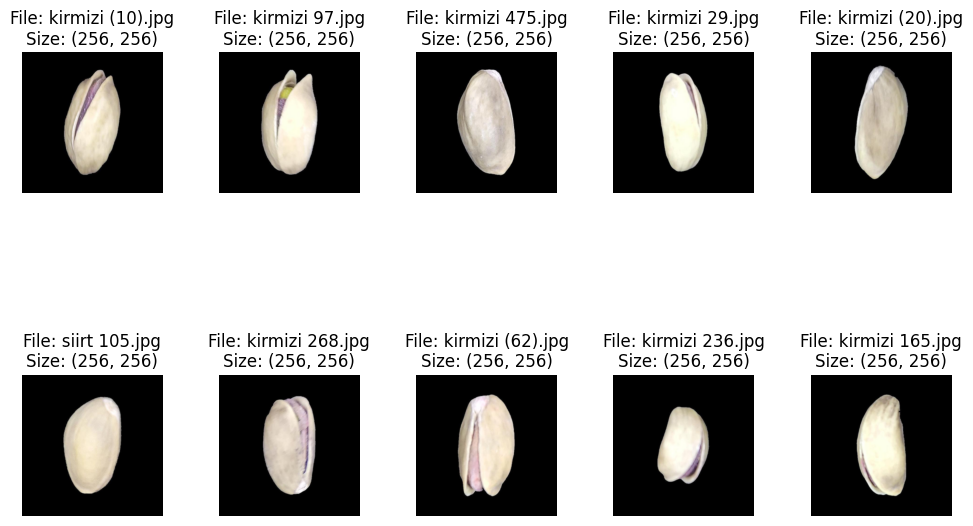

In [80]:
plt.figure(figsize=(12, 8))  
for i in range(10):  
    plt.subplot(2, 5, i + 1)  
    img = Image.open(os.path.join(folder_path, image_files[i]))
    img_resized = img.resize((256, 256))  
    plt.imshow(img_resized)
    plt.title(f"File: {image_files[i]}\nSize: {img_resized.size}")
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.1)  
plt.show()

## Average Image Color

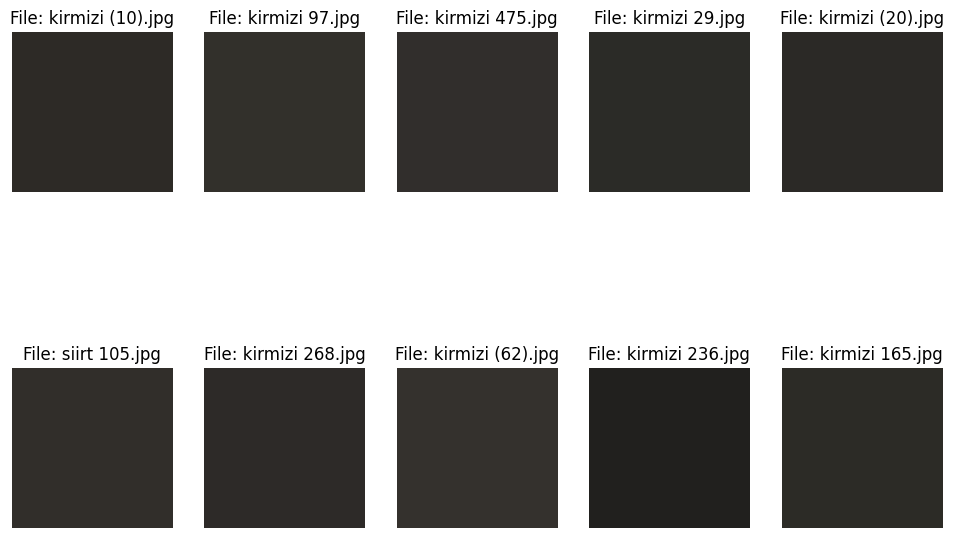

In [81]:
def average_color(img):
    img = img.resize((256, 256))
    img_array = np.array(img)
    avg_color = np.mean(img_array, axis=(0, 1))
    return avg_color

plt.figure(figsize=(12, 8))
for i in range(10):
    img = Image.open(os.path.join(folder_path, image_files[i]))
    avg_color = average_color(img)
    plt.subplot(2, 5, i + 1)
    plt.imshow([[avg_color / 255]])  # Normalisasi warna
    plt.axis('off')
    plt.title(f"File: {image_files[i]}")
plt.show()

## Check Noise

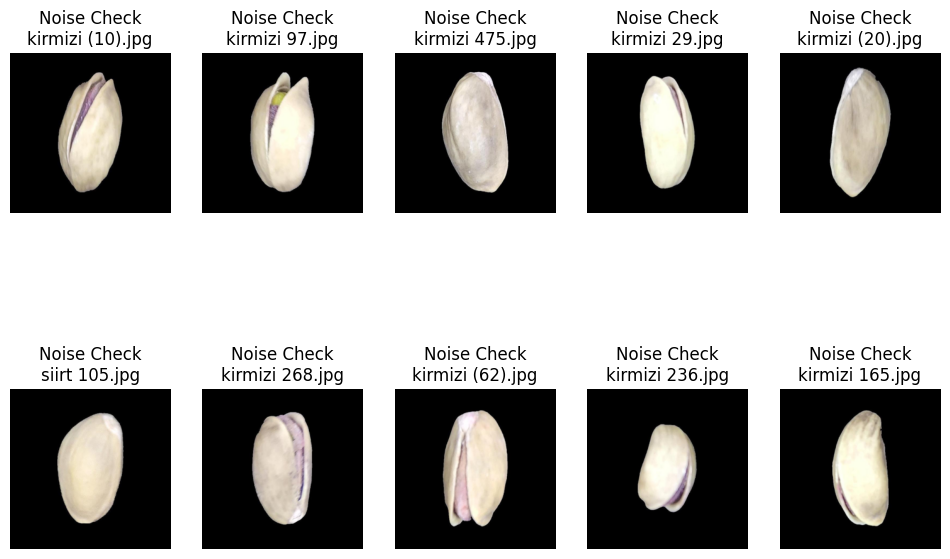

In [82]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = Image.open(os.path.join(folder_path, image_files[i]))
    img_resized = img.resize((256, 256))  # Resize gambar agar seragam
    plt.imshow(img_resized)
    plt.title(f"Noise Check\n{image_files[i]}")
    plt.axis('off')
plt.show()

## Check Dominant Colors

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

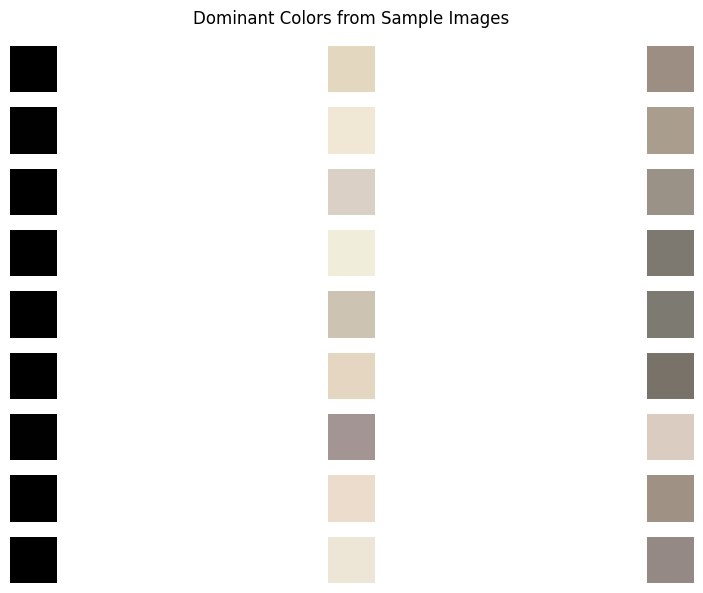

In [83]:
def get_dominant_color(img, k=3):
    img = img.resize((50, 50))
    img_np = np.array(img).reshape(-1, 3)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img_np)
    return kmeans.cluster_centers_.astype(int)

plt.figure(figsize=(12, 6))
for i in range(9):
    img = Image.open(os.path.join(folder_path, image_files[i]))
    colors = get_dominant_color(img, k=3)
    for j in range(3):
        plt.subplot(9, 3, i * 3 + j + 1)
        plt.imshow(np.ones((10, 10, 3), dtype=np.uint8) * colors[j])
        plt.axis('off')

plt.suptitle("Dominant Colors from Sample Images")
plt.tight_layout()
plt.show()

## Check Contrast and Lighting in Images

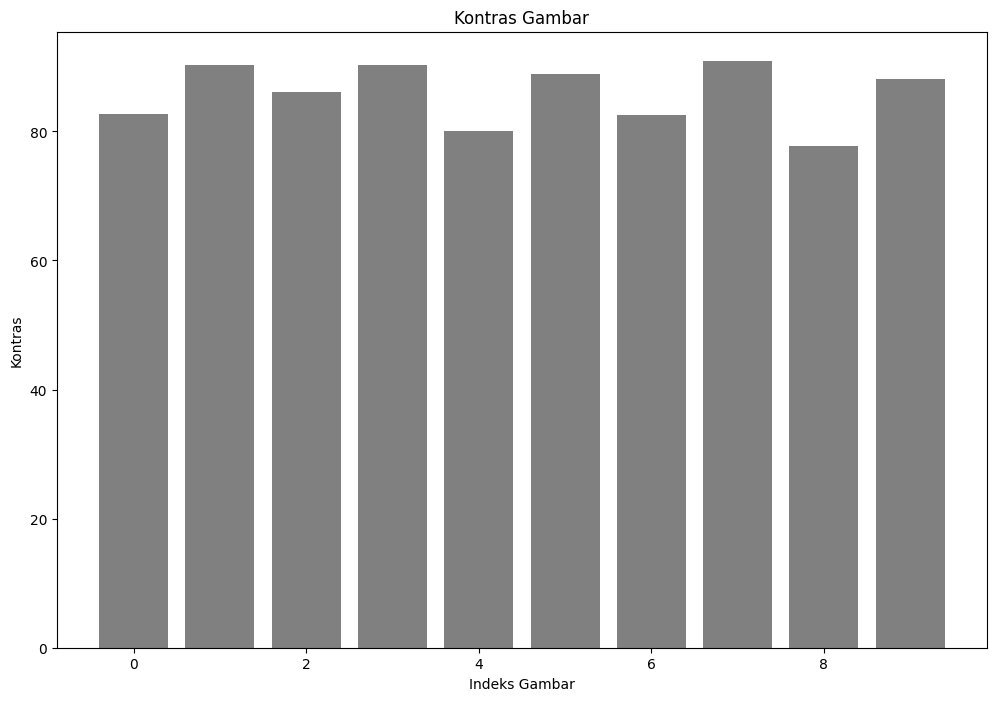

In [84]:
def calculate_contrast(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Resize gambar
    img_gray = img.convert('L')  # Konversi ke grayscale
    img_array = np.array(img_gray)
    contrast = np.std(img_array)  # Menghitung deviasi standar sebagai kontras
    return contrast

# Menampilkan kontras untuk 10 gambar pertama
contrast_values = [calculate_contrast(os.path.join(folder_path, image_files[i])) for i in range(10)]

plt.figure(figsize=(12, 8))
plt.bar(range(10), contrast_values, color='gray')
plt.title('Kontras Gambar')
plt.xlabel('Indeks Gambar')
plt.ylabel('Kontras')
plt.show()

## RGB Color Comparison in Images

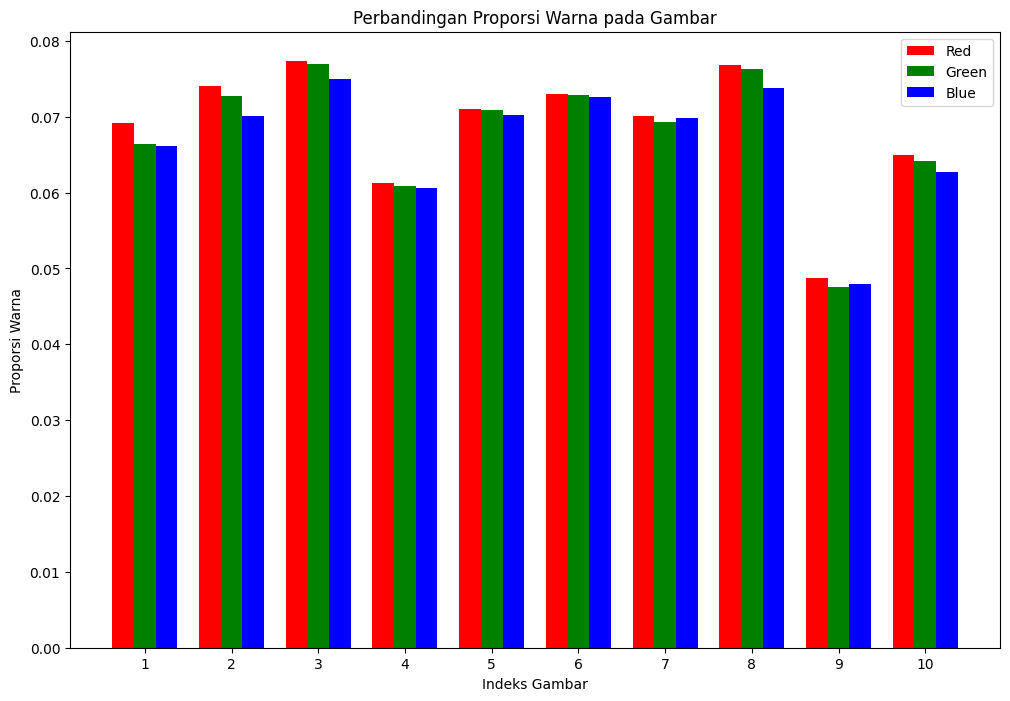

In [85]:
def color_proportions(img):
    img = img.resize((256, 256))
    img_array = np.array(img)
    red_proportion = np.sum(img_array[:, :, 0] > 127) / img_array.size
    green_proportion = np.sum(img_array[:, :, 1] > 127) / img_array.size
    blue_proportion = np.sum(img_array[:, :, 2] > 127) / img_array.size
    return red_proportion, green_proportion, blue_proportion

red_proportions = []
green_proportions = []
blue_proportions = []

for i in range(10):
    r, g, b = color_proportions(Image.open(os.path.join(folder_path, image_files[i])))
    red_proportions.append(r)
    green_proportions.append(g)
    blue_proportions.append(b)

plt.figure(figsize=(12, 8))
bar_width = 0.25
index = np.arange(10)
plt.bar(index, red_proportions, bar_width, label='Red', color='red')
plt.bar(index + bar_width, green_proportions, bar_width, label='Green', color='green')
plt.bar(index + 2 * bar_width, blue_proportions, bar_width, label='Blue', color='blue')

plt.title('Perbandingan Proporsi Warna pada Gambar')
plt.xlabel('Indeks Gambar')
plt.ylabel('Proporsi Warna')
plt.xticks(index + bar_width, range(1, 11))
plt.legend()
plt.show()


B. Untuk pemodelan, anda perlu untuk membagi data menjadi 80% training, 10%
validasi dan 10% testing, meresize image menjadi 100 x 100, dan membuat data yang mengandung noise
sesuai ketentuan di atas

In [86]:
def load_and_preprocess(image_path, target_size=(100, 100)):
    image = tf.io.read_file(image_path)  # Membaca file gambar
    image = tf.image.decode_jpeg(image, channels=3)  # Mendekode gambar
    image = tf.image.resize(image, target_size)  # Meresize gambar ke ukuran target
    image = tf.cast(image, tf.float32) / 255.0  # Normalisasi ke rentang [0, 1]
    return image

In [87]:
folder_path = '/kaggle/input/datasetno2/A_23' 

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
image_paths = [os.path.join(folder_path, f) for f in image_files]
dataset = tf.data.Dataset.from_tensor_slices(image_paths)
dataset = dataset.map(lambda x: load_and_preprocess(x))  


images = np.array(list(dataset.as_numpy_iterator()))

## Split Data

In [88]:
x_train, x_temp = train_test_split(images, test_size=0.2, random_state=42)
x_val, x_test = train_test_split(x_temp, test_size=0.5, random_state=42)

print(f"\nShape Data:")
print(f"Train: {x_train.shape} | Val: {x_val.shape} | Test: {x_test.shape}")


Shape Data:
Train: (859, 100, 100, 3) | Val: (107, 100, 100, 3) | Test: (108, 100, 100, 3)


## Noise

In [89]:
def add_gaussian_noise(images, mean=0.0, std=0.1):
    noise = np.random.normal(mean, std, size=images.shape)  
    noisy_images = images + noise  
    return np.clip(noisy_images, 0.0, 1.0)

In [90]:
x_train_noisy = add_gaussian_noise(x_train)
x_val_noisy = add_gaussian_noise(x_val)
x_test_noisy = add_gaussian_noise(x_test)

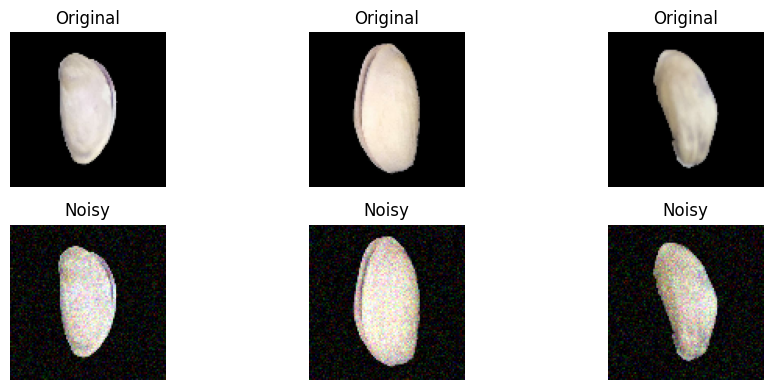

In [91]:
plt.figure(figsize=(10, 4))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[i])
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 3, i+4)
    plt.imshow(x_train_noisy[i])
    plt.title("Noisy")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Autoencoder

In [92]:
def create_baseline_model(input_shape=(100, 100, 3)):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    
    # Decoder
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    # Model
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')  # Menggunakan MSE loss untuk autoencoder
    return model


In [93]:
baseline_model = create_baseline_model()
baseline_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_12 (UpSampling2D)      │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 50, 50, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_13 (UpSampling2D)      │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 100, 100, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
history_callback = tf.keras.callbacks.History()

In [95]:
history= baseline_model.fit(
  x_train_noisy, x_train,
  epochs= 100,
  batch_size= 8,
  validation_data= (x_val_noisy, x_val),
  callbacks= [
    tf.keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True),
    tf.keras.callbacks.ReduceLROnPlateau(factor= 0.5, patience= 5)
  ]
)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0607 - val_loss: 0.0050 - learning_rate: 0.0010
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.0017 - learning_rate: 0.0010


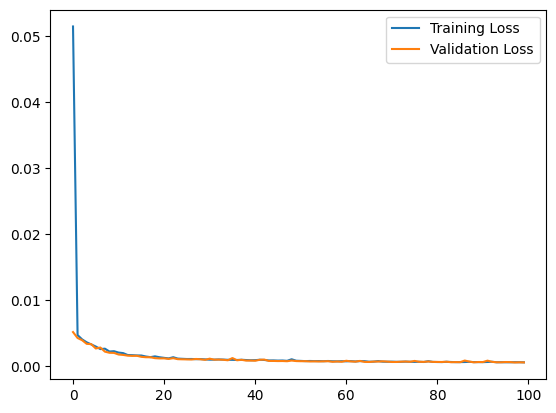

In [111]:
import matplotlib.pyplot as plt
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.legend()
plt.show()

1.Penurunan Stabil: Training Loss menunjukkan penurunan yang stabil sepanjang pelatihan. Penurunan yang konsisten ini menunjukkan bahwa model berhasil mempelajari pola-pola dalam data pelatihan dengan baik.

Model Belajar dengan Baik: Penurunan yang stabil juga menandakan bahwa model dapat mengkurasi data dengan semakin baik, sehingga kesalahan dalam data pelatihan semakin berkurang.

2. Validation Loss:
Fluktuasi dan Lonjakan: Validation Loss menunjukkan fluktuasi yang lebih besar dibandingkan dengan Training Loss. Meskipun ada penurunan di awal, kita dapat melihat lonjakan pada beberapa titik. Lonjakan ini bisa menandakan bahwa model mungkin tidak dapat menggeneralisasi dengan baik pada data yang belum terlihat (data validasi), meskipun sudah berhasil pada data pelatihan.

D.Lakukan modifikasi model autoencoder yang diberikan, anda dapat
mengubah susunan arsitektur encoder atau decodernya

## Modification Autoencoder

In [97]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def create_modified_model(input_shape=(100, 100, 3)):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    
    # Menambahkan Dropout untuk menghindari overfitting
    x = layers.Dropout(0.3)(x)
    
    # Decoder
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    # Model
    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')  
    return model



In [98]:
modified_autoencoder = create_modified_model()
modified_autoencoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_14 (UpSampling2D)      │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 50, 50, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_15 (UpSampling2D)      │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 100, 100, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 100, 100, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 426,307 (1.63 MB)

 Trainable params: 426,307 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

## Training The Modified Model

In [99]:
history = modified_autoencoder.fit(
    x_train_noisy, x_train, 
    epochs=100, 
    batch_size=32,  
    validation_data=(x_val_noisy, x_val)
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - loss: 0.1114 - val_loss: 0.0051
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/st

In [100]:
# Evaluasi model pada data testing
test_loss = modified_autoencoder.evaluate(x_test_noisy, x_test)
print(f"Test loss: {test_loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 5.2414e-04
Test loss: 0.000511718972120434


In [101]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

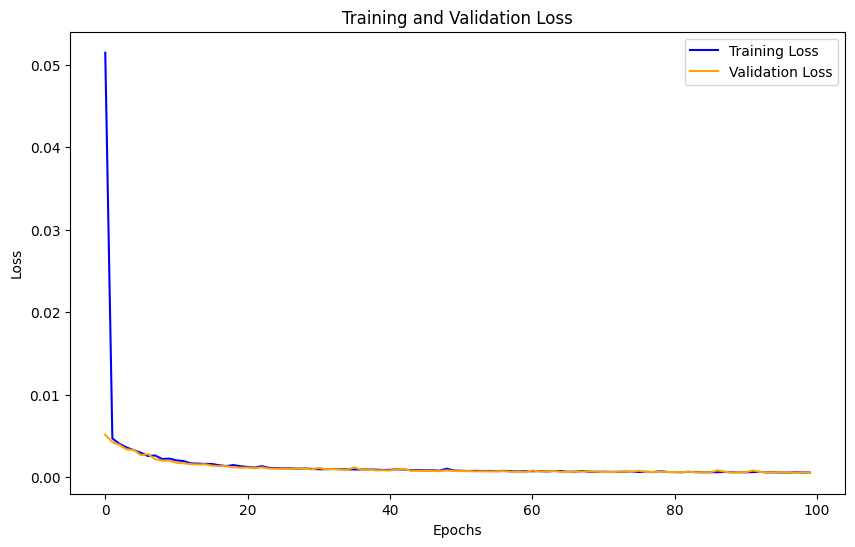

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss', color='blue') 
plt.plot(validation_loss, label='Validation Loss', color='orange')  
plt.title('Training and Validation Loss')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.legend()  
plt.show()

Pada plot ini, baik Training Loss (dengan garis biru) maupun Validation Loss (dengan garis oranye) menunjukkan penurunan yang stabil sepanjang pelatihan, yang mengindikasikan bahwa model semakin belajar dengan baik. Penurunan ini menunjukkan bahwa model mulai menguasai pola dalam data, yang merupakan tanda bahwa proses pelatihan berjalan dengan baik.

Secara keseluruhan, tren yang terlihat pada grafik ini menunjukkan bahwa model bekerja dengan baik, tidak overfitting atau underfitting, dan dapat melakukan generalisasi dengan baik terhadap data validation.

E. Lakukan evaluasi terhadap model baseline (c) dan model modifikasi (d) dengan
menghitung niai SSIMnya, jelaskan analisa anda.

## Evaluation

In [103]:
!pip install scikit-image

In [104]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

In [105]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim(original, predicted):
    # Menghitung SSIM dengan menambahkan data_range untuk gambar yang memiliki tipe data float32
    ssim_value = ssim(original, predicted, multichannel=True, win_size=3, channel_axis=-1, data_range=1.0)
    return ssim_value

In [106]:
# Menghitung SSIM untuk model baseline
baseline_predictions = baseline_model.predict(x_test_noisy)
baseline_ssim = calculate_ssim(x_test, baseline_predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [107]:
# Menghitung SSIM untuk model modifikasi
modified_predictions = modified_autoencoder.predict(x_test_noisy)
modified_ssim = calculate_ssim(x_test, modified_predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step


In [108]:
# Menampilkan hasil SSIM
print(f"Baseline Model SSIM: {baseline_ssim}")
print(f"Modified Model SSIM: {modified_ssim}")

Baseline Model SSIM: 0.9708690047264099
Modified Model SSIM: 0.9788045883178711


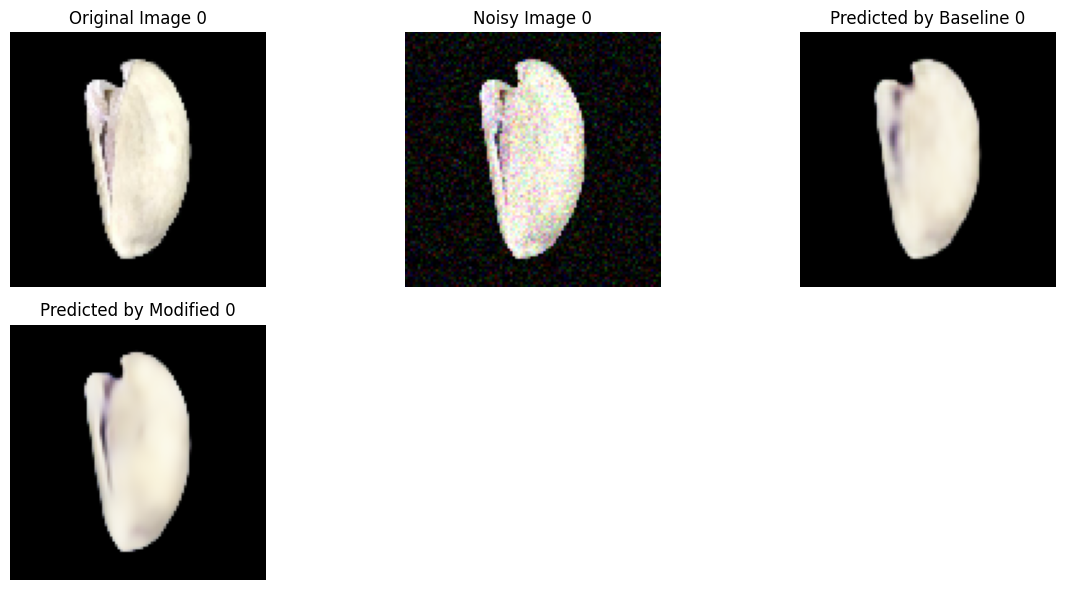

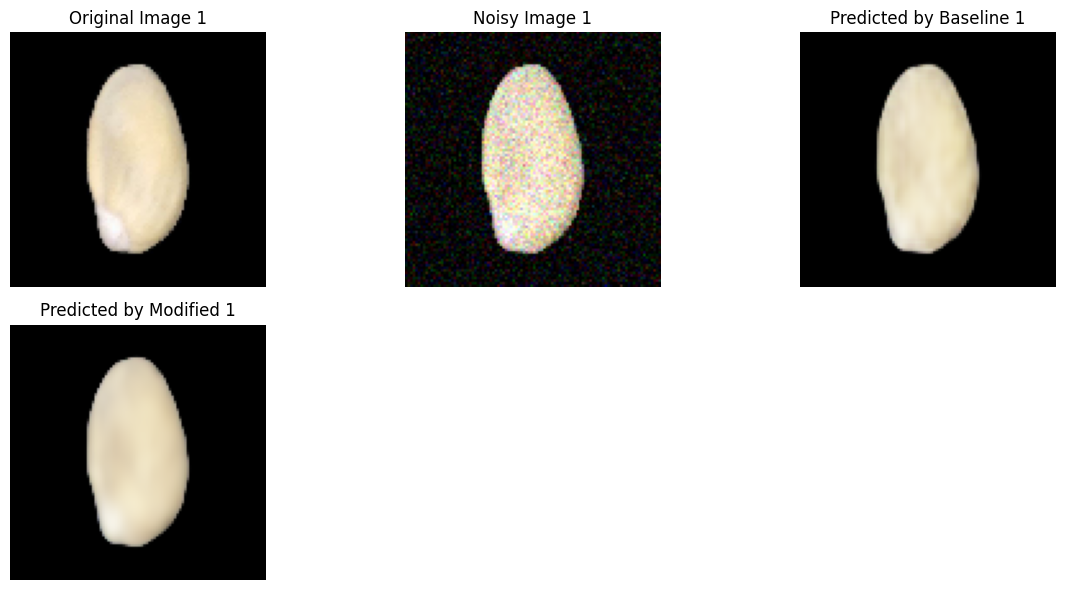

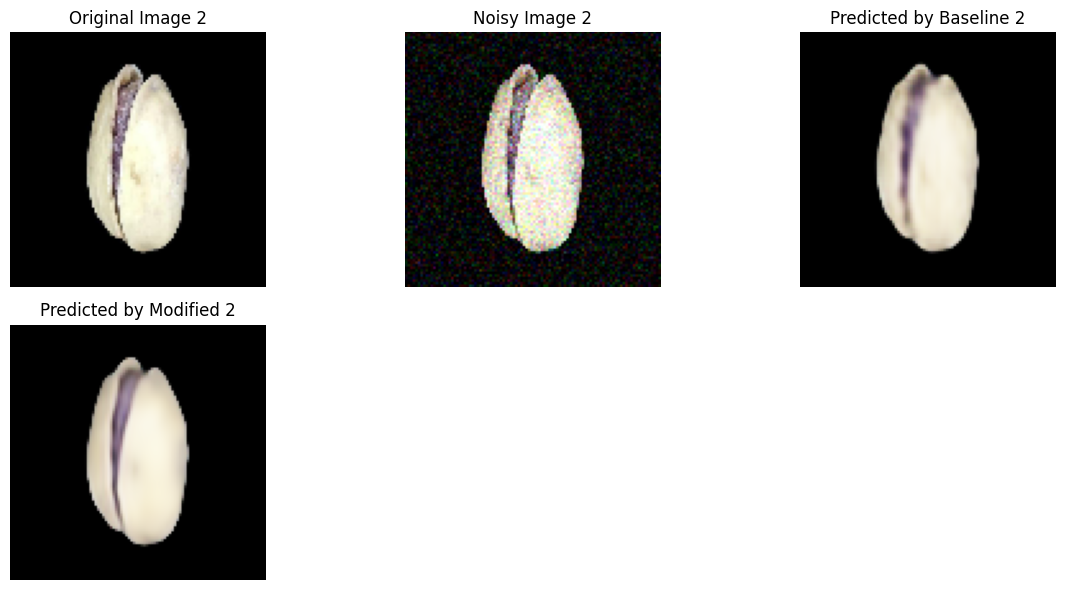

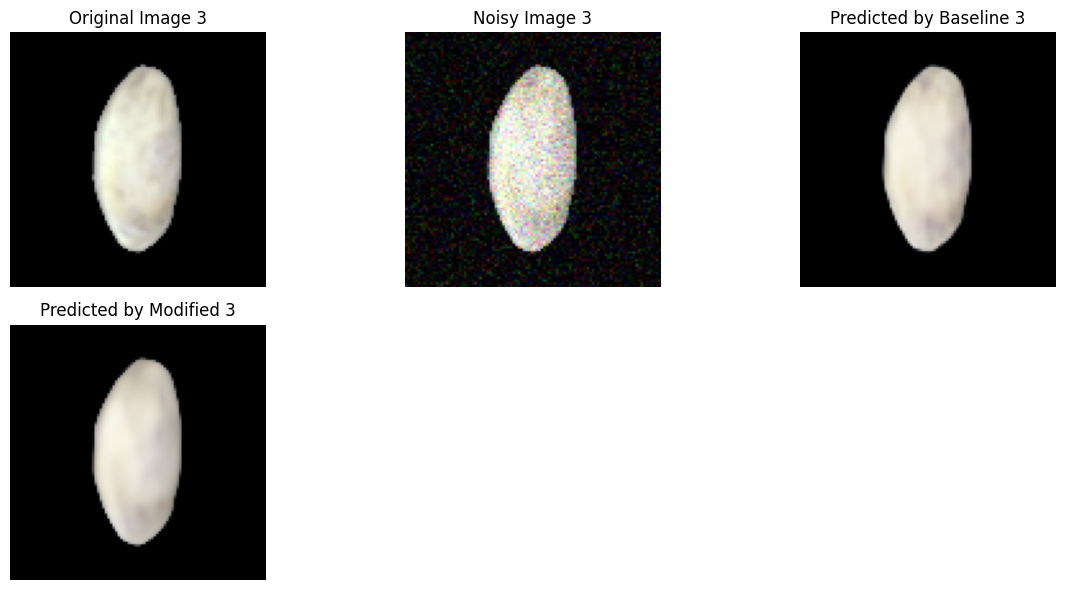

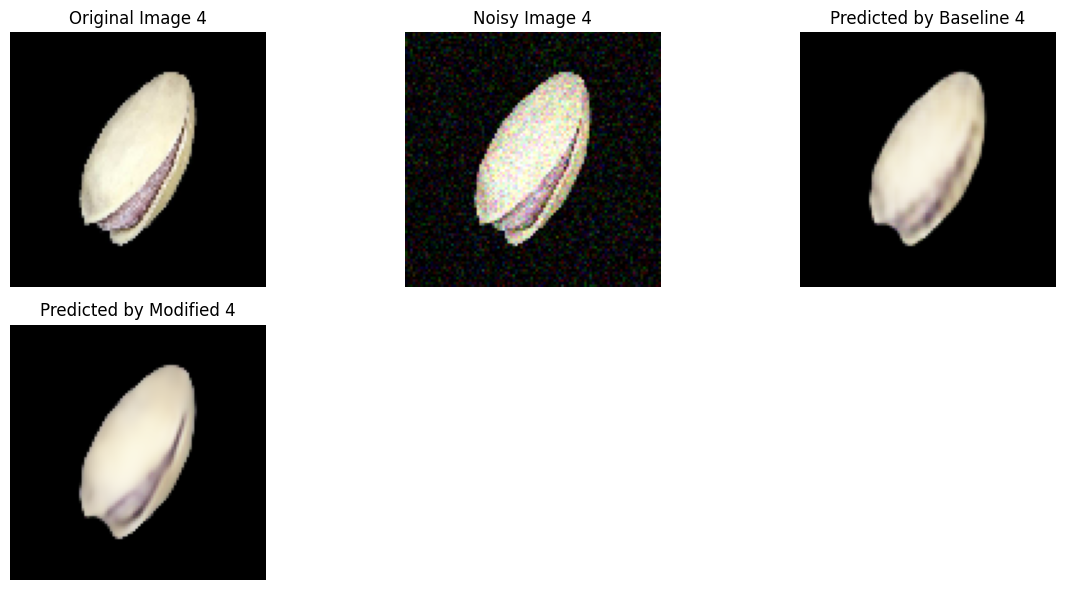

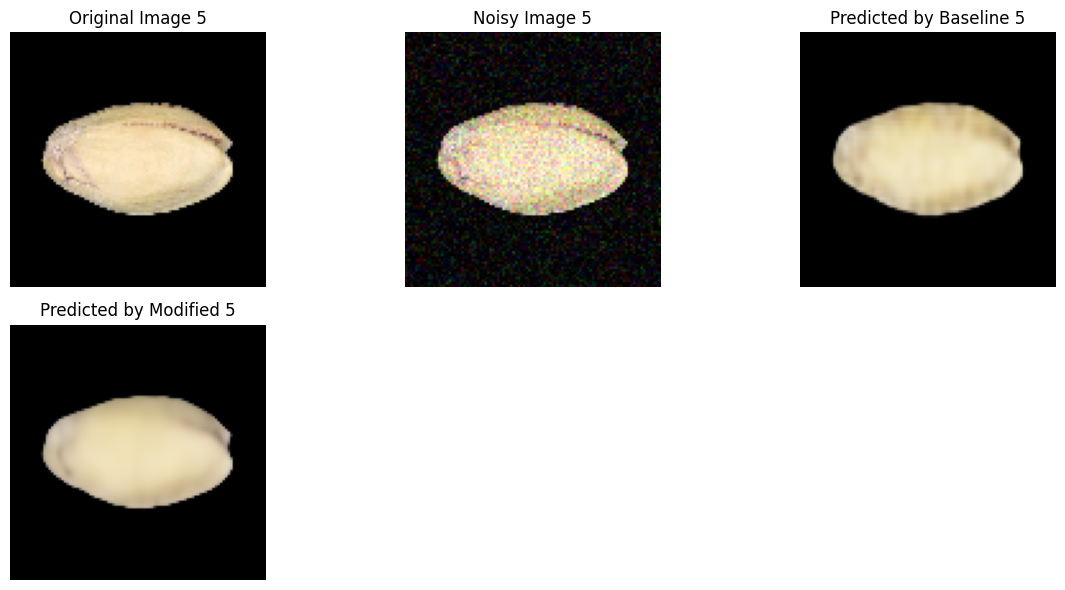

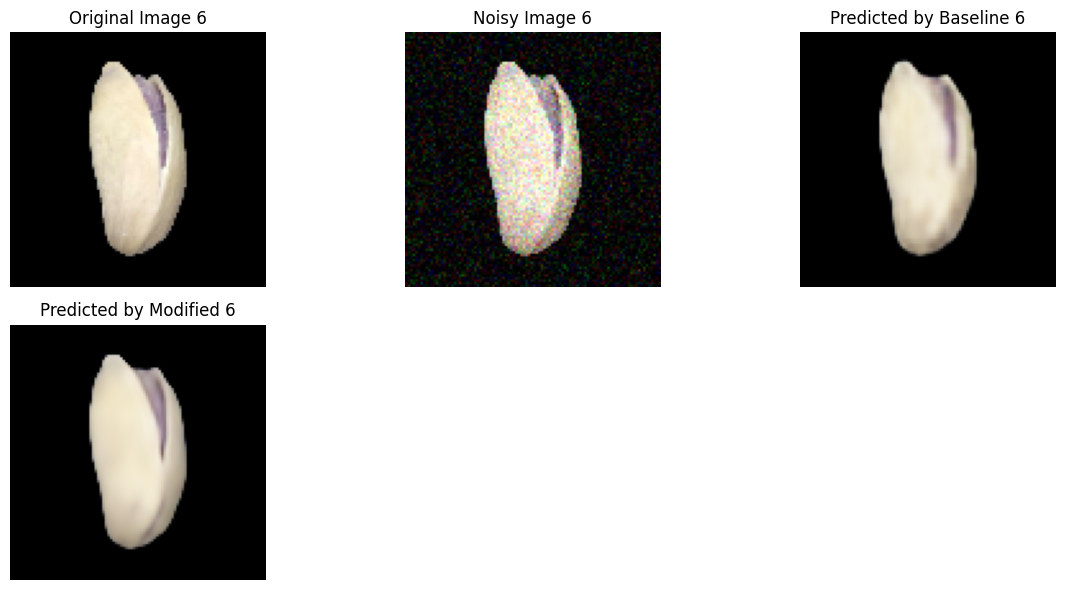

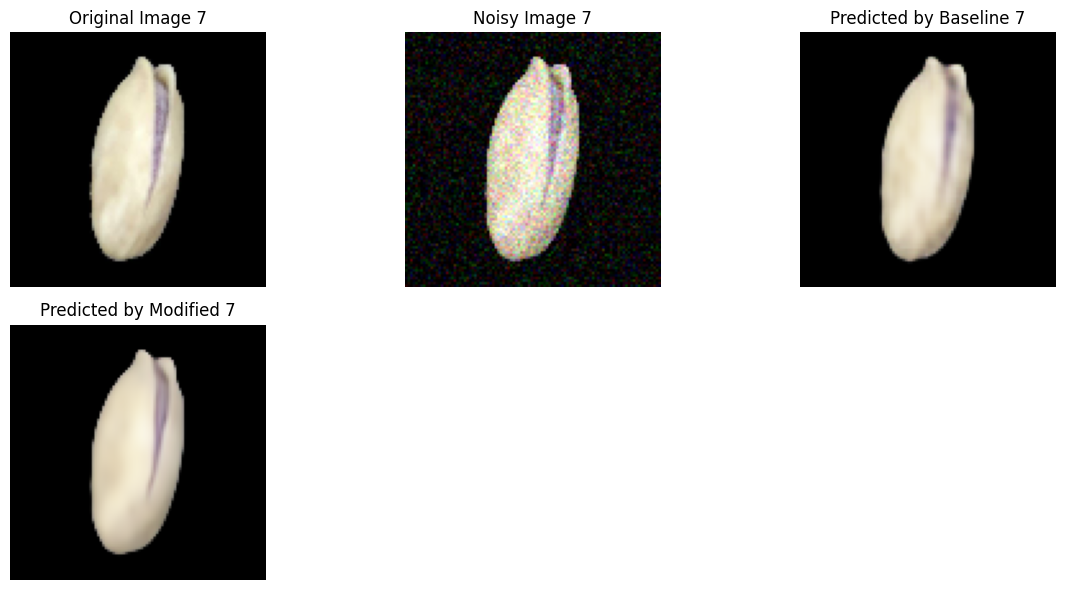

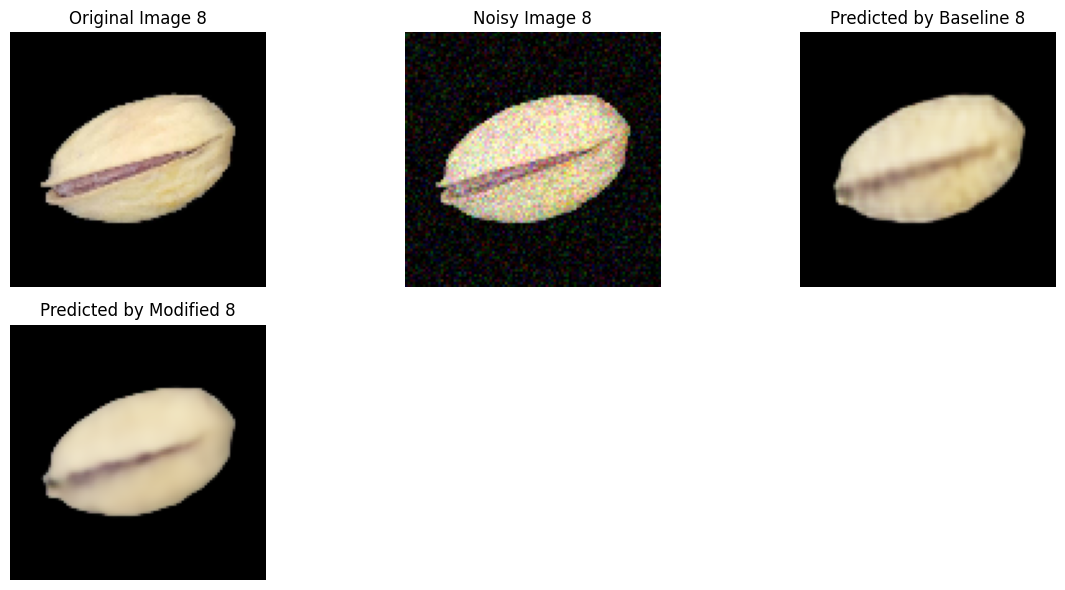

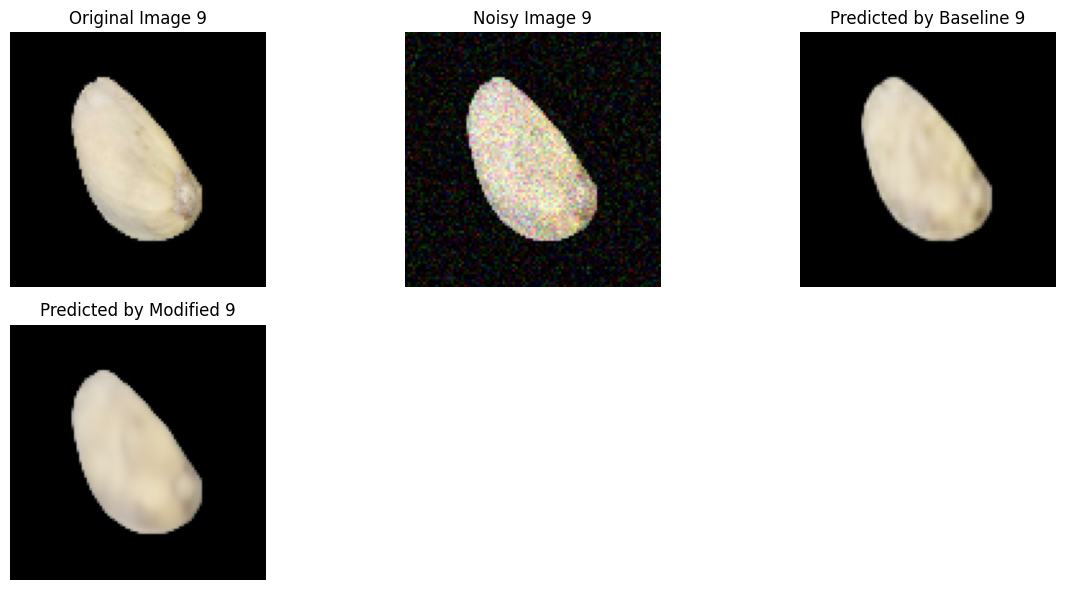

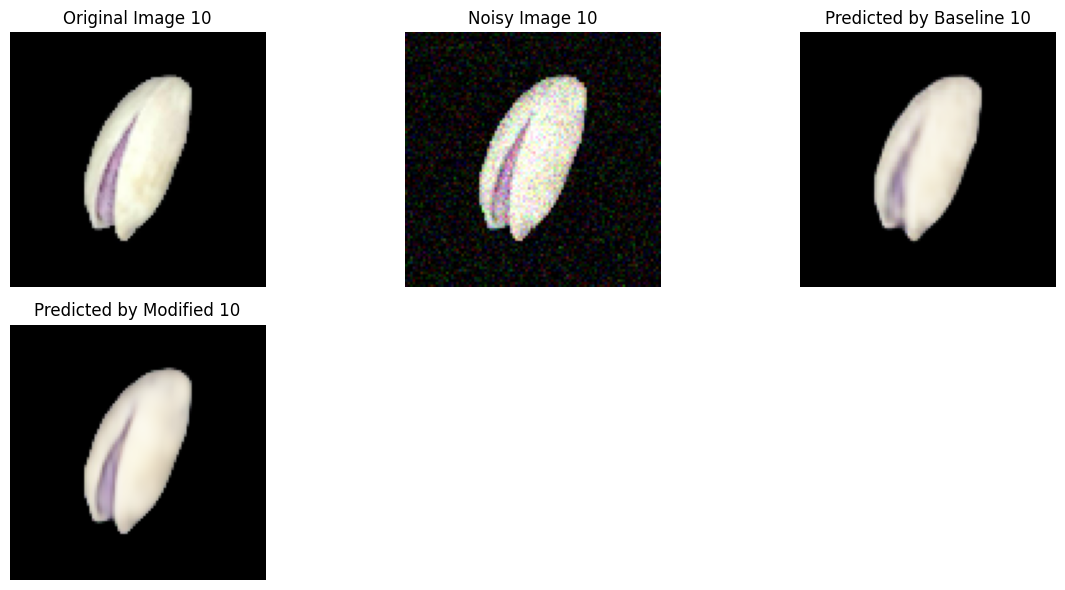

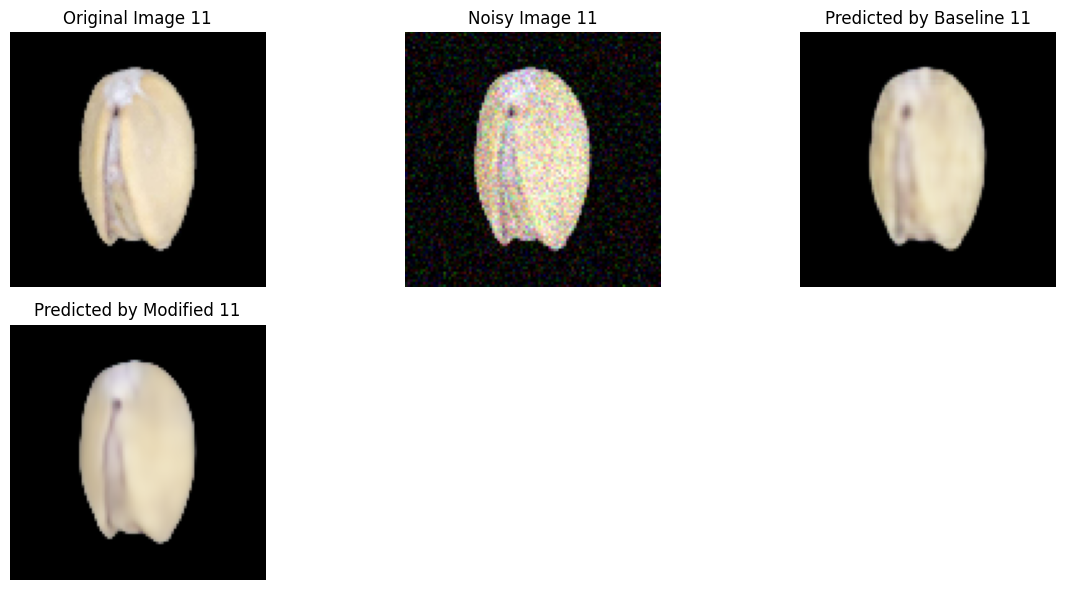

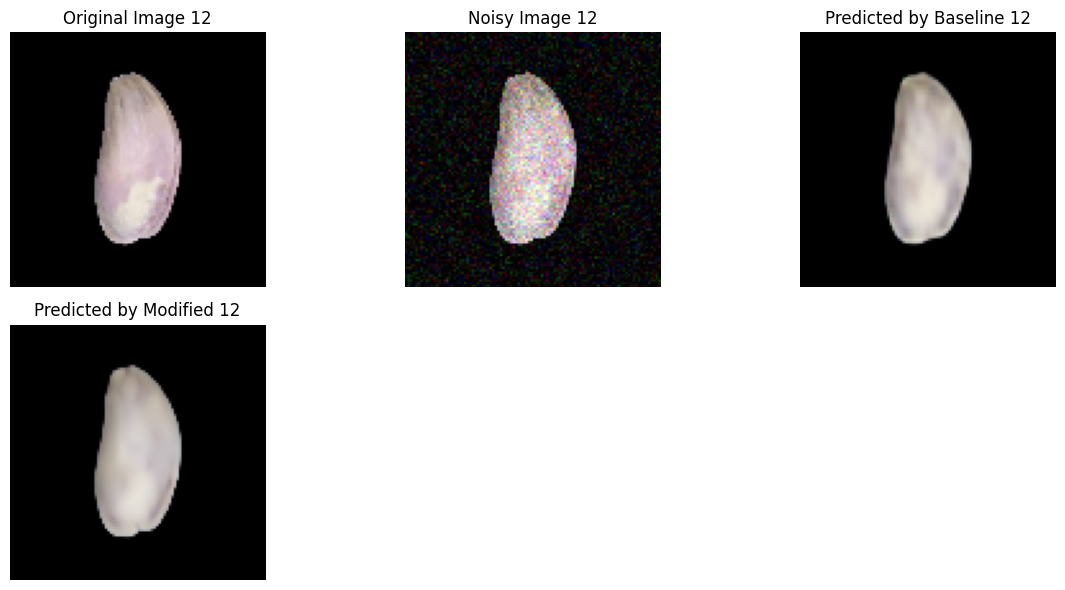

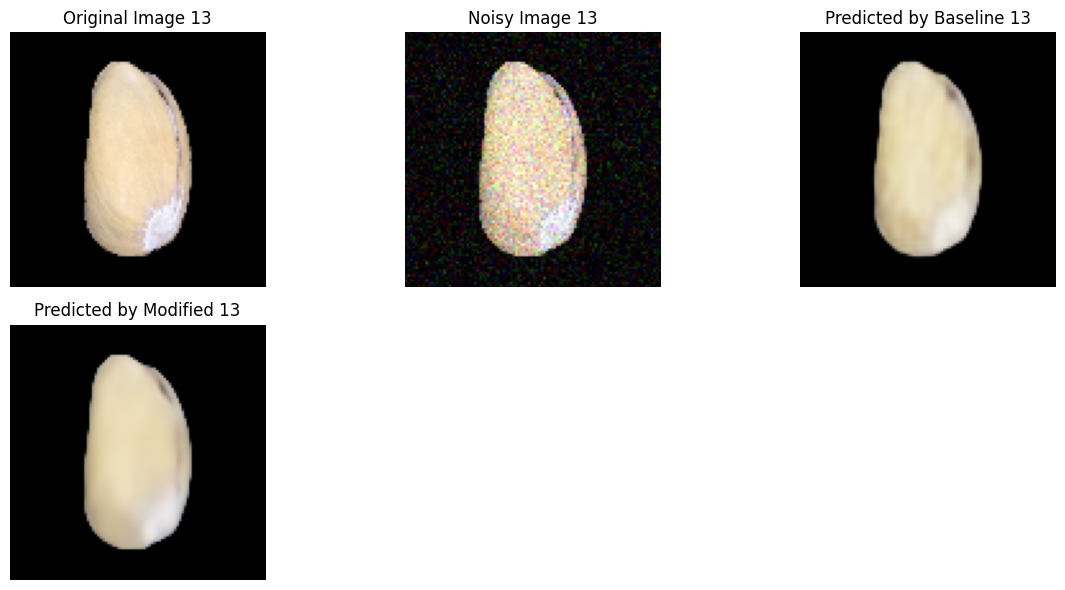

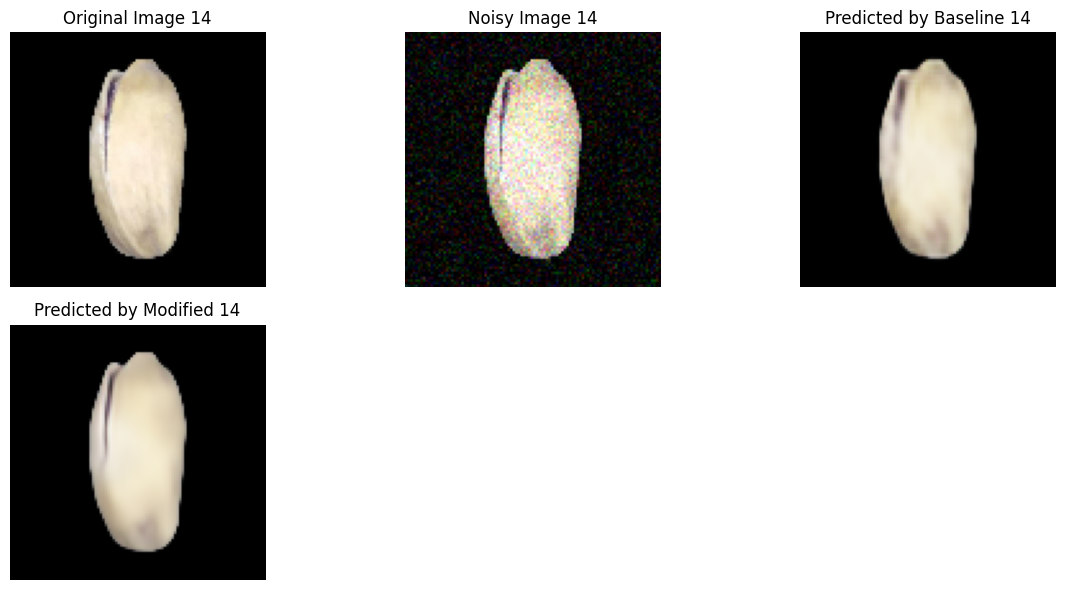

In [109]:
import matplotlib.pyplot as plt

def plot_comparison(original, noisy, baseline_pred, modified_pred, index):
    plt.figure(figsize=(12, 6))

    # Gambar asli
    plt.subplot(2, 3, 1)
    plt.imshow(original)
    plt.title(f"Original Image {index}")
    plt.axis('off')

    # Gambar noisy
    plt.subplot(2, 3, 2)
    plt.imshow(noisy)
    plt.title(f"Noisy Image {index}")
    plt.axis('off')

    # Gambar prediksi dari model baseline
    plt.subplot(2, 3, 3)
    plt.imshow(baseline_pred)
    plt.title(f"Predicted by Baseline {index}")
    plt.axis('off')

    # Gambar prediksi dari model modifikasi
    plt.subplot(2, 3, 4)
    plt.imshow(modified_pred)
    plt.title(f"Predicted by Modified {index}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()  # Pastikan plt.show() dipanggil setelah setiap plot

# Menampilkan perbandingan untuk 15 gambar pertama
for i in range(0, 15):
    plot_comparison(
        x_test[i],  
        x_test_noisy[i],  
        baseline_predictions[i],  
        modified_predictions[i],  
        i  
    )


Analisa : Nilai SSIM sebesar 0.9709 menunjukkan bahwa baseline model menghasilkan hasil rekonstruksi gambar dengan kesamaan struktural yang sangat tinggi dengan gambar asli. Secara umum, SSIM di atas 0.95 biasanya menunjukkan kualitas gambar yang sangat baik.


Modified Model SSIM: 0.9788
Nilai SSIM sebesar 0.9788 untuk modified model menunjukkan peningkatan yang signifikan dibandingkan dengan baseline model. Hal ini mengindikasikan bahwa modified model lebih baik dalam menjaga kesamaan struktural gambar asli setelah proses rekonstruksi.

Meskipun perbedaan antara kedua nilai SSIM tidak terlalu besar, namun peningkatan ini masih sangat signifikan dalam konteks kualitas visual rekonstruksi gambar, yang bisa berarti peningkatan yang berarti dalam aplikasi praktis, terutama jika gambar tersebut digunakan dalam konteks yang sangat memperhatikan kualitas visual.